In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\EVANS\Documents\Company_House_Info.csv')
print(df.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [3]:
# Show basic info: data types, non-null counts
df.info()

# Display summary statistics for numeric columns
df.describe()

# Check for missing values in each column
print(df.isnull().sum())

# View the first few rows again to refresh context
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6665 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.fillna(method='ffill', inplace=True)  # Forward fill

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25432\1452096905.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [5]:
df.ffill(inplace=True)

In [6]:
# Set your target column name
target_column = 'Bankrupt?'

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target value counts:\n", y.value_counts())

Features shape: (6665, 95)
Target shape: (6665,)
Target value counts:
 Bankrupt?
0    6446
1     219
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (5332, 95)
Test set size: (1333, 95)


In [8]:
# Set your target column name
target_column = 'Bankrupt?'

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target value counts:\n", y.value_counts())

Features shape: (6665, 95)
Target shape: (6665,)
Target value counts:
 Bankrupt?
0    6446
1     219
Name: count, dtype: int64


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Model was 
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9699924981245311

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1289
           1       0.60      0.27      0.38        44

    accuracy                           0.97      1333
   macro avg       0.79      0.63      0.68      1333
weighted avg       0.96      0.97      0.96      1333



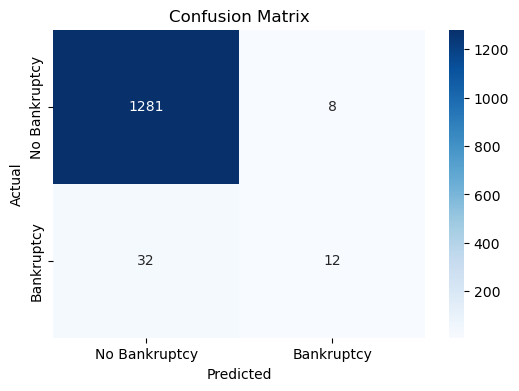

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bankruptcy', 'Bankruptcy'], yticklabels=['No Bankruptcy', 'Bankruptcy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

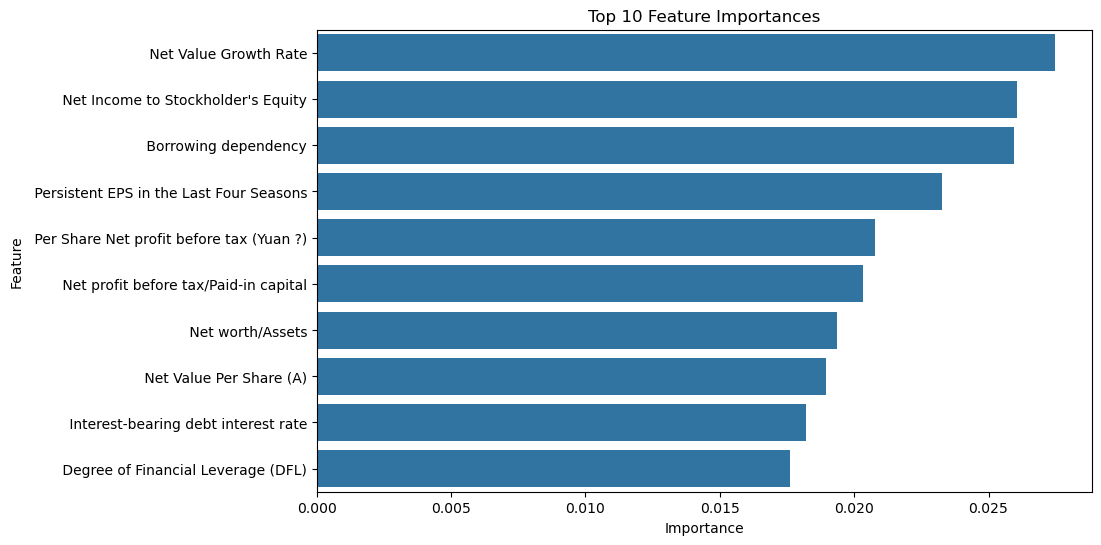

In [11]:
import pandas as pd

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 10 Feature Importances')
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6665 non-null   float64
 8    Aft

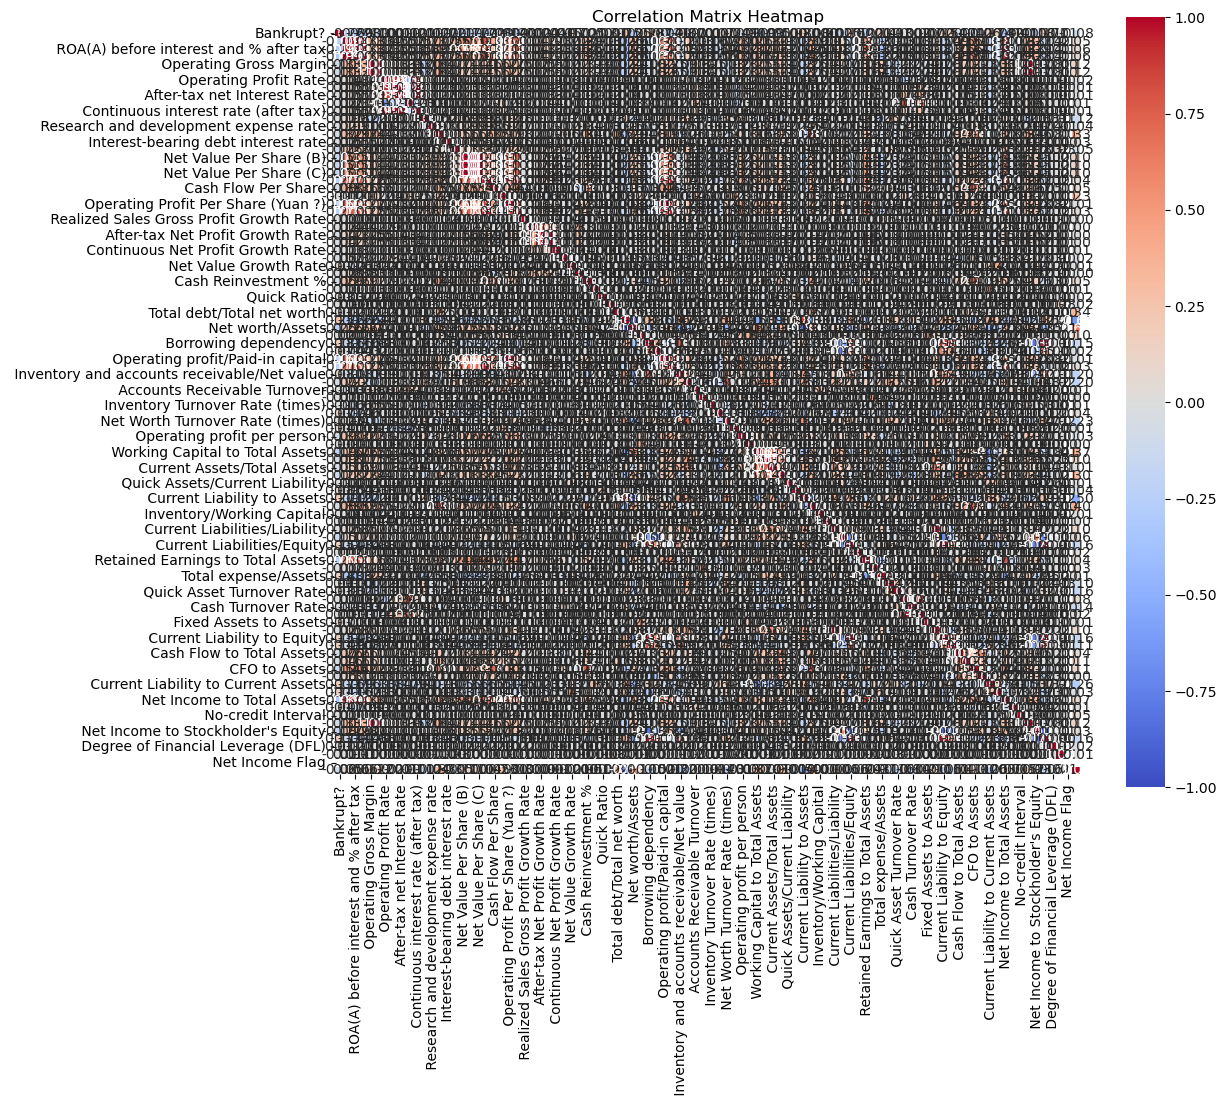


Strong Correlations (|corr| > 0.7):
                        Feature 1                            Feature 2  \
20         Operating Gross Margin                Gross Profit to Sales   
139         Gross Profit to Sales               Operating Gross Margin   
48        Net Value Per Share (C)              Net Value Per Share (A)   
43        Net Value Per Share (A)              Net Value Per Share (C)   
21    Realized Sales Gross Margin               Operating Gross Margin   
..                            ...                                  ...   
88           Borrowing dependency   Net Income to Stockholder's Equity   
83               Net worth/Assets          Current Liability to Assets   
113   Current Liability to Assets                     Net worth/Assets   
82               Net worth/Assets                         Debt ratio %   
80                   Debt ratio %                     Net worth/Assets   

     Correlation  
20      1.000000  
139     1.000000  
48      0.999833 

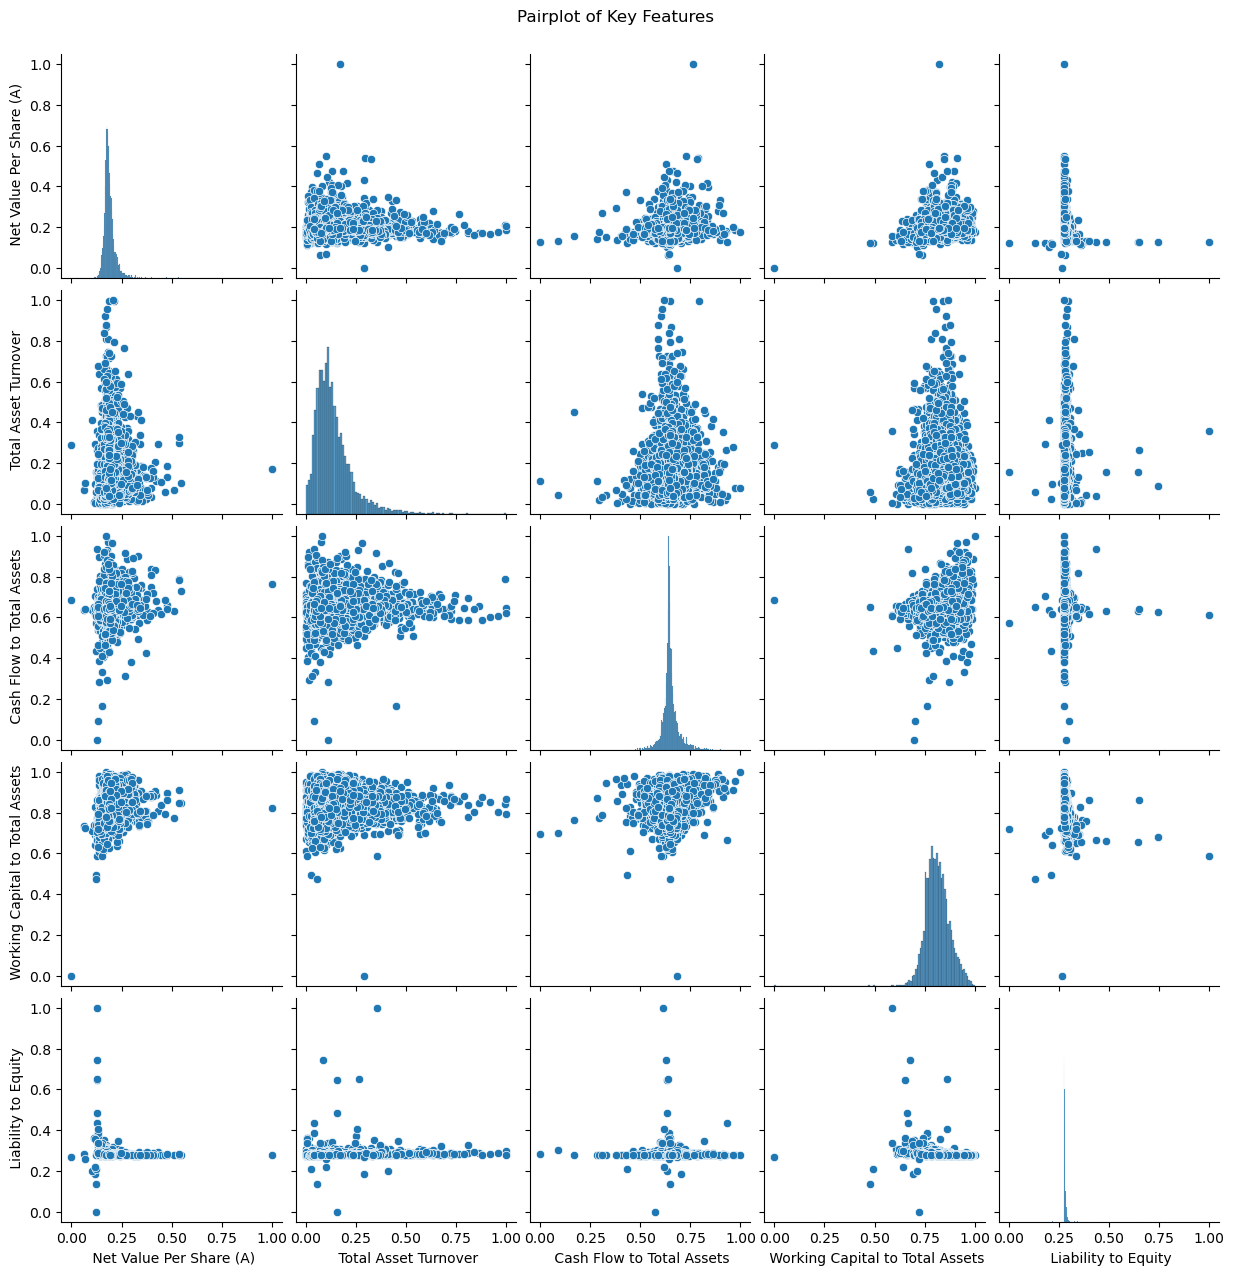

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset was loaded
df = pd.read_csv(r'C:\Users\Documents\Company_House_Info.csv')

# Overview of the dataset
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# missing values were checked for
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Correlation matrix was done
corr_matrix = df.corr(numeric_only=True)  # numeric_only=True to exclude non-numeric columns if any
print("\nCorrelation Matrix:")
print(corr_matrix)

# Correlation matrix was visualised with a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify strong correlations
strong_corr = corr_matrix[(corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)].stack().reset_index()
strong_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nStrong Correlations (|corr| > 0.7):")
print(strong_corr.sort_values(by='Correlation', ascending=False))

# Pairplot for key variables 
# A subset of important features or top correlated variables were selected to target
key_features = strong_corr['Feature 1'].unique().tolist() + strong_corr['Feature 2'].unique().tolist()
key_features = list(set(key_features))  # unique features only

# If too many features, pick top 5
if len(key_features) > 5:
    key_features = key_features[:5]

sns.pairplot(df[key_features])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

Dataset loaded. Shape: (6665, 96)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6

C:\Users\EVANS\.conda\envs\Company_prediction\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
94 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EVANS\.conda\envs\Company_prediction\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EVANS\.conda\envs\Company_prediction\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\EVANS\.conda\envs\Company_prediction\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
 


Best hyperparameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

--- Model Evaluation ---
Training Accuracy: 1.0000
Test Accuracy: 0.9677

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1289
           1       0.53      0.23      0.32        44

    accuracy                           0.97      1333
   macro avg       0.75      0.61      0.65      1333
weighted avg       0.96      0.97      0.96      1333



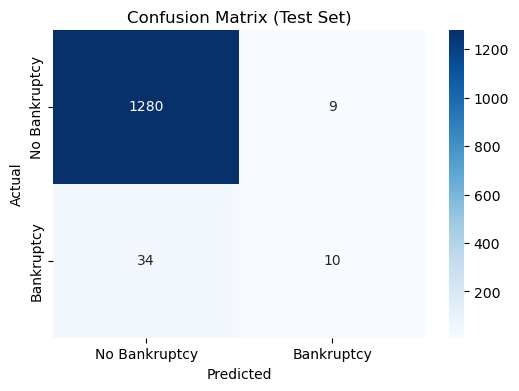

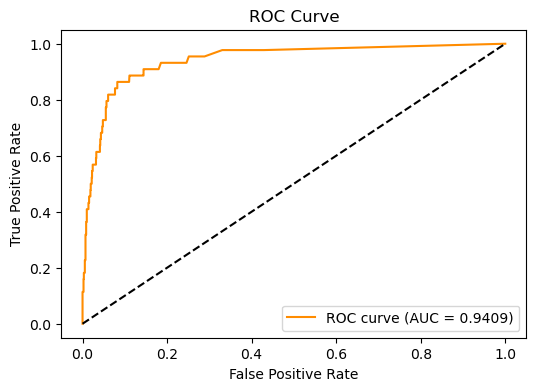

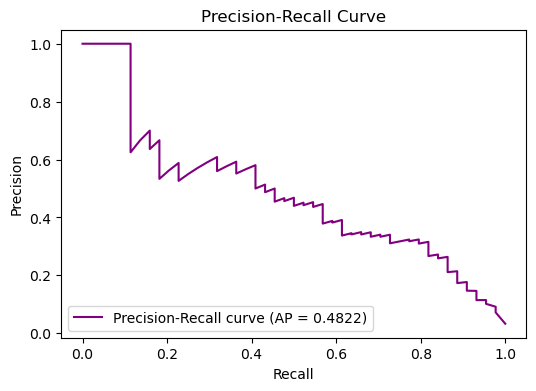

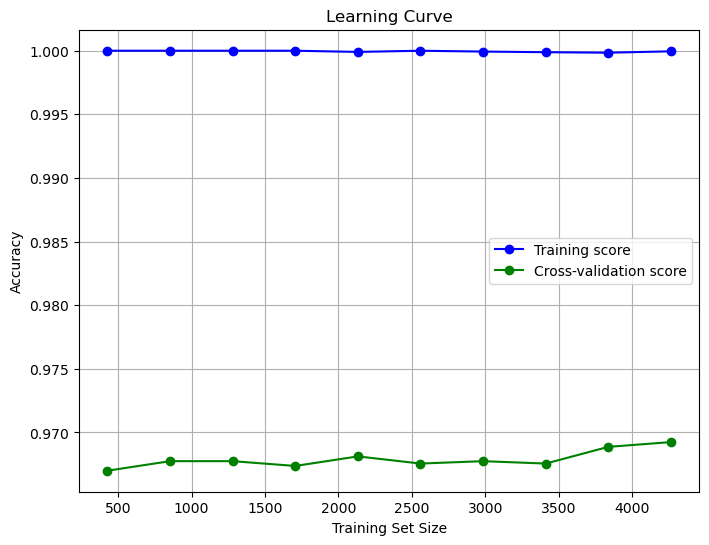

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25432\499236465.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


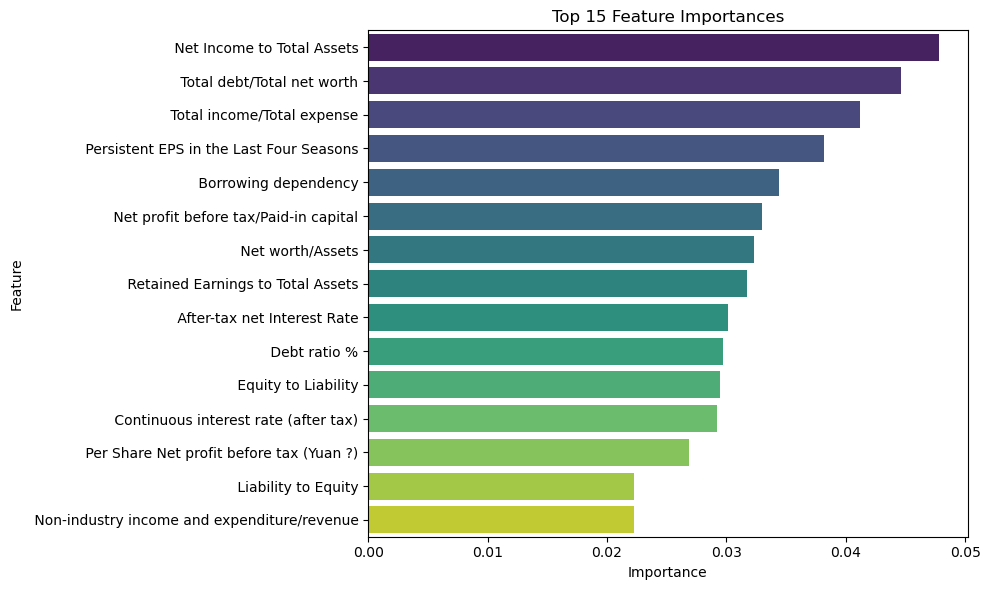

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.utils.class_weight import compute_class_weight

# Dataset was loaded
df = pd.read_csv(r'C:\Users\EVANS\Documents\Company_House_Info.csv')
print("Dataset loaded. Shape:", df.shape)

# Basic exploration was conducted
print("\nData info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Forward fill was used to handle missing values
df.ffill(inplace=True)

# Target column
target_column = 'Bankrupt?'

# Features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"\nTarget distribution:\n{y.value_counts(normalize=True)}")

# Train-Test Split was carried out
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Class imbalance was handles
# First of all class weight was computed to handle the imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("\nClass weights:", class_weight_dict)

# Hyperparameter was tuned with GridSearchCV 
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

print("\nStarting GridSearchCV for hyperparameter tuning...")
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\nBest hyperparameters found:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Training and Test Sets were evaluated
def evaluate_model(model, X_train, y_train, X_test, y_test):
    print("\n--- Model Evaluation ---")

    # Predict on the test set 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Detailed classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # For the Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Bankruptcy', 'Bankruptcy'],
                yticklabels=['No Bankruptcy', 'Bankruptcy'])
    plt.title('Confusion Matrix (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # For ROC Curve and AUC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', color='darkorange')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # For Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)

    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.4f})', color='purple')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

    # For Learning Curve
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    train_scores_mean = train_scores.mean(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='green', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Feature Importance
    importances = model.feature_importances_
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title('Top 15 Feature Importances')
    plt.tight_layout()
    plt.show()

# Evaluation was run 
evaluate_model(best_rf, X_train, y_train, X_test, y_test)
